In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import LogNorm
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import  RBF


import Bgolearn.BGOsampling as BGOS 

 Bgolearn : A Bayesian global optimization package 
 10 Jul 2022, version 1, Bin Cao, MGI, SHU, Shanghai, CHINA.


In [2]:
def True_function(X):
    X = np.array(X)
    Y = 0.013*X**4 - 0.25*X**3 + 1.61*X**2 - 4.1*X + 8
    return Y

In [3]:
def generate_function(data, obs):
    print('------------12 original data-----------')
    data = np.array(data)
    # for one feature dataset
    data_matrix = np.array(data[:,0]).reshape(-1, 1)

    Measured_response = np.zeros(len(data_matrix))
    for i in range(obs):
        Measured_response += np.array(data[:,i+1])
    # for one feature dataset
    Measured_response = Measured_response/obs
    
    Measured_std = []
    for j in range(len(data_matrix)):
        std = np.std(np.array(data[j,1:1+obs]))
        Measured_std.append(std)
    Measured_std = np.array(Measured_std)  
    print('evaluated mean of y :', Measured_response)
    print('evaluated std of y :', Measured_std)
    print('---------------------------------------\n')
    return data_matrix,Measured_response,Measured_std

## design virtual samples

In [4]:
virtual_samples = np.linspace(0,11,100)

## define a callable Kriging model and sampling function

In [5]:
def Sam_function(X,real_std,obs):
    print('--------------Draw samples-------------')
    print('real std of added datum:', real_std)
    X = np.array(X)
    Y = np.zeros(1)
    Y_list = []
    for i in range(obs):
        __sam = 0.013*X**4 - 0.25*X**3 + 1.61*X**2 - 4.1*X + 8 + np.random.normal(loc=0.0, scale=real_std, size=None)
        Y_list.append(__sam)
        Y += __sam
        print(i+1,'-th sampling, result = ', __sam)
    cal_std = np.std(np.array(Y_list))
    print('evaluated mean of added datum:', Y/obs)
    print('evaluated std of added datum:', cal_std)
    print('---------------------------------------\n')
    return Y/obs, np.array(cal_std)


## instantiate Bgolearn

In [7]:
Bgolearn = BGOS.Bgolearn()
method_name = 'REI'


------------12 original data-----------
evaluated mean of y : [6.21494888 5.56581958 4.61988109 4.34056442 4.35646479 4.67190767
 4.62173112 4.55605355 4.70138419 4.48867457 5.8769712  7.75473896]
evaluated std of y : [0.30008321 0.2742029  0.07394358 0.91538122 0.33136727 0.29720623
 0.07801782 0.48293232 0.24548787 0.12272781 0.21645983 0.25832216]
---------------------------------------

current optimal is : 4.251646319418976
The next datum recomended by Reinterpolation Expected Improvement : 
 x =  [8.44444444]
--------------Draw samples-------------
real std of added datum: 0.7
1 -th sampling, result =  3.7378902565452714
2 -th sampling, result =  4.123324568123792
3 -th sampling, result =  4.278823453090101
evaluated mean of added datum: [4.04667943]
evaluated std of added datum: 0.2273881250910923
---------------------------------------

1-th iteration 
 new added datum: [8.4, array([4.0467])]


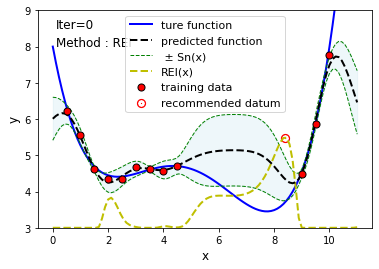

current optimal is : 4.065047691759734
The next datum recomended by Reinterpolation Expected Improvement : 
 x =  [8.44444444]
--------------Draw samples-------------
real std of added datum: 0.3
1 -th sampling, result =  3.514707600752284
2 -th sampling, result =  3.720059997379868
3 -th sampling, result =  3.9704211934672884
evaluated mean of added datum: [3.73506293]
evaluated std of added datum: 0.1863465153036238
---------------------------------------

2-th iteration 
 new added datum: [8.4, array([3.7351])]


<Figure size 432x288 with 0 Axes>

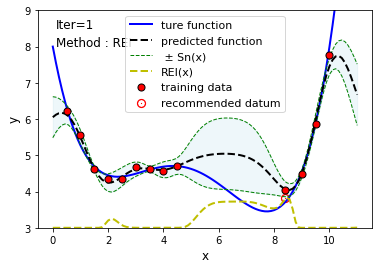

current optimal is : 3.874835653439562
The next datum recomended by Reinterpolation Expected Improvement : 
 x =  [7.11111111]
--------------Draw samples-------------
real std of added datum: 0.3
1 -th sampling, result =  3.3688991511750532
2 -th sampling, result =  3.5077741626878547
3 -th sampling, result =  3.8688995798211603
evaluated mean of added datum: [3.58185763]
evaluated std of added datum: 0.21073898135652588
---------------------------------------

3-th iteration 
 new added datum: [7.1, array([3.5819])]


<Figure size 432x288 with 0 Axes>

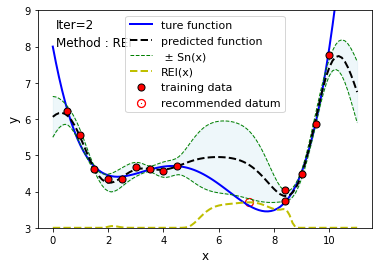

current optimal is : 3.6359741517330635
The next datum recomended by Reinterpolation Expected Improvement : 
 x =  [6.44444444]
--------------Draw samples-------------
real std of added datum: 0.3
1 -th sampling, result =  4.103777653921756
2 -th sampling, result =  4.035289800118941
3 -th sampling, result =  4.295045080654721
evaluated mean of added datum: [4.14470418]
evaluated std of added datum: 0.10992250826720719
---------------------------------------

4-th iteration 
 new added datum: [6.4, array([4.1447])]


<Figure size 432x288 with 0 Axes>

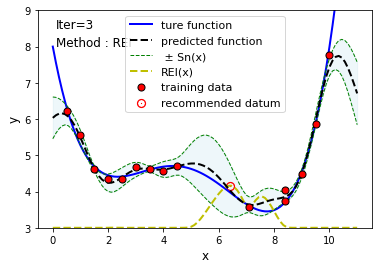

current optimal is : 3.644433054989798
The next datum recomended by Reinterpolation Expected Improvement : 
 x =  [7.55555556]
--------------Draw samples-------------
real std of added datum: 0.7
1 -th sampling, result =  3.5979037759372545
2 -th sampling, result =  2.2270367531985418
3 -th sampling, result =  2.7632092481423376
evaluated mean of added datum: [2.86271659]
evaluated std of added datum: 0.5640599153653346
---------------------------------------

5-th iteration 
 new added datum: [7.6, array([2.8627])]


<Figure size 432x288 with 0 Axes>

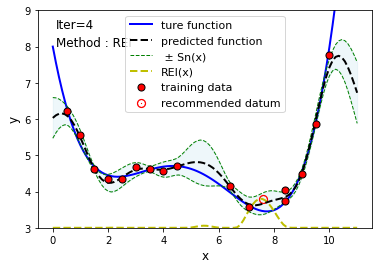

<Figure size 432x288 with 0 Axes>

In [8]:
obs = 3

data = pd.read_csv('data.csv')
data_matrix, Measured_response,Measured_std = generate_function(data,obs)
for i in range(500):
    plt.figure()
    ax1 = plt.subplot()
    ax1.set_ylim([3, 9])
    
   
    class Kriging_model(object):
        def fit_pre(self,xtrain,ytrain,xtest):
            # instantiated model
            kernel = RBF() 
            mdoel = GaussianProcessRegressor(kernel=kernel,normalize_y=True,alpha = Measured_std**2).fit(xtrain,ytrain)
            # defined the attribute's outputs
            mean,std = mdoel.predict(xtest,return_std=True)
            return mean,std  
    

    y_mean_pre,y_mean_std = Kriging_model().fit_pre(data_matrix, Measured_response, virtual_samples.reshape(-1,1))
    ax1.scatter(data_matrix,Measured_response,c='r',s=50,zorder=10,edgecolors=(0,0,0),label="training data")
    ax1.plot(virtual_samples,True_function(virtual_samples),'b',lw=2,label="ture function")
    ax1.plot(virtual_samples,y_mean_pre,'k--',lw=2,zorder=9,label="predicted function")
    ax1.fill_between(virtual_samples,y_mean_pre-y_mean_std,y_mean_pre+y_mean_std,alpha=0.2,color='lightblue')
    ax1.plot(virtual_samples,y_mean_pre-y_mean_std,'g--',lw=1,label=' ± Sn(x)') 
    ax1.plot(virtual_samples,y_mean_pre+y_mean_std,'g--',lw=1)

    
    Bgolearn = BGOS.Bgolearn()
    # min_search = False:  searching the global maximum
    model = Bgolearn.fit(Kriging_model,data_matrix,Measured_response,virtual_samples,opt_num = 1,min_search = True)
    # recall the utility function 
    _return = model.Reinterpolation_EI()*10 + 3
    
    
    index = np.random.choice(np.flatnonzero(_return == _return.max()))
    recommend = virtual_samples[index]
    ax1.plot(virtual_samples,_return,'y--',lw=2,label='{name}(x)'.format(name = method_name))
    
    # give an intrinsic std to recommended datum
    sam_std = round(random.uniform(0.1,0.7),1)
    datum_y, datum_std = Sam_function(round(recommend,1),sam_std,obs)
    Measured_std = np.append(Measured_std,datum_std)
    data_matrix = np.append(data_matrix,np.round(recommend,1)).reshape(-1,1)
    Measured_response = np.append(Measured_response,np.round(datum_y,4))

    print("{num}-th iteration".format(num = i + 1),'\n', 'new added datum:',([np.round(recommend,1),np.round(datum_y,4)]))
    ax1.scatter(round(recommend,1),_return[index],c='red',s=1.5,linewidths=8,label="recommended datum") 
    
    
    plt.text(0.1,8,'Method : {name}'.format(name = method_name),fontsize=12,color='k')
    plt.text(0.1,8.5,'Iter={}'.format(i),fontsize=12,color='k')
    plt.xlabel('x',fontsize = 12)
    plt.ylabel('y',fontsize = 12)
    plt.legend(fontsize = 11)
    plt.savefig('{name}-obs_{obstime}-{num}.png'.format(name = method_name,obstime = obs,num = i),dpi=800)
    plt.show()
    plt.clf()
    if 7.6 <= round(recommend,1) <= 7.8:
        break
    elif i>=10:
        print('Searching is defeated')
        break

------------12 original data-----------
evaluated mean of y : [6.29185161 5.39856881 4.62623151 4.38385368 4.46148423 4.63694734
 4.5905237  4.59016103 4.67177078 4.4811777  5.95522378 7.80150911]
evaluated std of y : [0.29202661 0.37457828 0.06497479 0.79628133 0.33976528 0.26441507
 0.08652626 0.42238334 0.21869861 0.10707566 0.23132562 0.23792876]
---------------------------------------

current optimal is : 4.3718073781469755
The next datum recomended by Reinterpolation Expected Improvement : 
 x =  [8.44444444]
--------------Draw samples-------------
real std of added datum: 0.6
1 -th sampling, result =  3.008372138484622
2 -th sampling, result =  3.2560171956489823
3 -th sampling, result =  3.8077236154735883
4 -th sampling, result =  4.253735084573278
evaluated mean of added datum: [3.58146201]
evaluated std of added datum: 0.4841207826899127
---------------------------------------

1-th iteration 
 new added datum: [8.4, array([3.5815])]


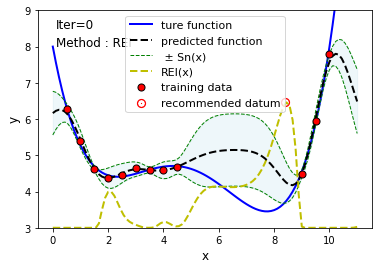

current optimal is : 3.7776532853277747
The next datum recomended by Reinterpolation Expected Improvement : 
 x =  [8.22222222]
--------------Draw samples-------------
real std of added datum: 0.5
1 -th sampling, result =  3.7544481930304676
2 -th sampling, result =  3.92893090377906
3 -th sampling, result =  3.225901132507327
4 -th sampling, result =  4.06863508921655
evaluated mean of added datum: [3.74447883]
evaluated std of added datum: 0.31942215970667204
---------------------------------------

2-th iteration 
 new added datum: [8.2, array([3.7445])]


<Figure size 432x288 with 0 Axes>

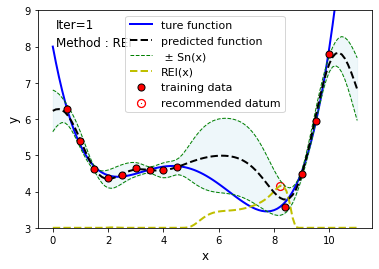

current optimal is : 3.725692898937266
The next datum recomended by Reinterpolation Expected Improvement : 
 x =  [8.33333333]
--------------Draw samples-------------
real std of added datum: 0.7
1 -th sampling, result =  3.0989976102812893
2 -th sampling, result =  4.865991219991521
3 -th sampling, result =  5.546420387513733
4 -th sampling, result =  3.7750782858052103
evaluated mean of added datum: [4.32162188]
evaluated std of added datum: 0.9473633631811028
---------------------------------------

3-th iteration 
 new added datum: [8.3, array([4.3216])]


<Figure size 432x288 with 0 Axes>

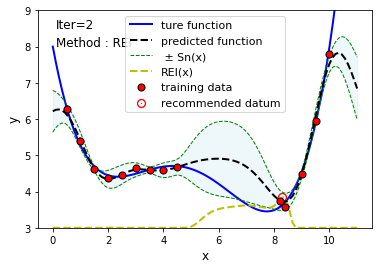

current optimal is : 3.75953520172036
The next datum recomended by Reinterpolation Expected Improvement : 
 x =  [8.33333333]
--------------Draw samples-------------
real std of added datum: 0.3
1 -th sampling, result =  3.9927163659253133
2 -th sampling, result =  3.7002691380451953
3 -th sampling, result =  2.9776807068620075
4 -th sampling, result =  3.113485055741531
evaluated mean of added datum: [3.44603782]
evaluated std of added datum: 0.4163654410769809
---------------------------------------

4-th iteration 
 new added datum: [8.3, array([3.446])]


<Figure size 432x288 with 0 Axes>

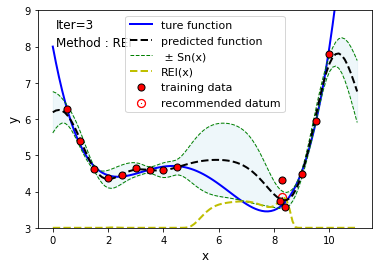

current optimal is : 3.6855682621612686
The next datum recomended by Reinterpolation Expected Improvement : 
 x =  [6.88888889]
--------------Draw samples-------------
real std of added datum: 0.6
1 -th sampling, result =  3.4621477484210588
2 -th sampling, result =  3.341424579300263
3 -th sampling, result =  4.272424660860699
4 -th sampling, result =  4.078555183793927
evaluated mean of added datum: [3.78863804]
evaluated std of added datum: 0.3951889531337444
---------------------------------------

5-th iteration 
 new added datum: [6.9, array([3.7886])]


<Figure size 432x288 with 0 Axes>

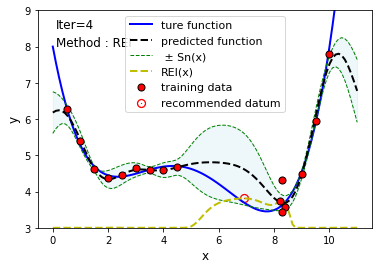

current optimal is : 3.6715021215016987
The next datum recomended by Reinterpolation Expected Improvement : 
 x =  [8.]
--------------Draw samples-------------
real std of added datum: 0.4
1 -th sampling, result =  3.4020273875566476
2 -th sampling, result =  3.5287987264401983
3 -th sampling, result =  3.1329846825470904
4 -th sampling, result =  3.835748140225548
evaluated mean of added datum: [3.47488973]
evaluated std of added datum: 0.25265240675076106
---------------------------------------

6-th iteration 
 new added datum: [8.0, array([3.4749])]


<Figure size 432x288 with 0 Axes>

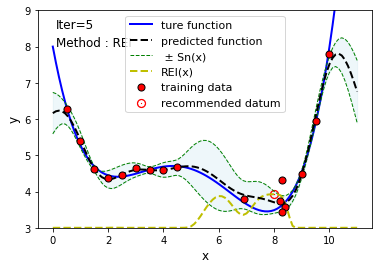

current optimal is : 3.573893512552469
The next datum recomended by Reinterpolation Expected Improvement : 
 x =  [8.11111111]
--------------Draw samples-------------
real std of added datum: 0.6
1 -th sampling, result =  3.470612928898917
2 -th sampling, result =  3.2879527847107637
3 -th sampling, result =  3.129556678072341
4 -th sampling, result =  4.048429759039962
evaluated mean of added datum: [3.48413804]
evaluated std of added datum: 0.34742793116945436
---------------------------------------

7-th iteration 
 new added datum: [8.1, array([3.4841])]


<Figure size 432x288 with 0 Axes>

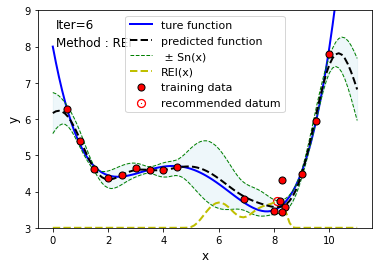

current optimal is : 3.5513451202885227
The next datum recomended by Reinterpolation Expected Improvement : 
 x =  [6.]
--------------Draw samples-------------
real std of added datum: 0.1
1 -th sampling, result =  4.215565231830847
2 -th sampling, result =  4.118137421009447
3 -th sampling, result =  4.194700729025632
4 -th sampling, result =  4.313417629994361
evaluated mean of added datum: [4.21045525]
evaluated std of added datum: 0.0696386209101594
---------------------------------------

8-th iteration 
 new added datum: [6.0, array([4.2105])]


<Figure size 432x288 with 0 Axes>

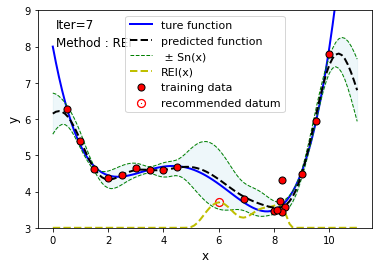

current optimal is : 3.549361402286519
The next datum recomended by Reinterpolation Expected Improvement : 
 x =  [8.11111111]
--------------Draw samples-------------
real std of added datum: 0.5
1 -th sampling, result =  3.104110047926897
2 -th sampling, result =  3.6788919397927935
3 -th sampling, result =  3.5782727809895603
4 -th sampling, result =  3.842300418973843
evaluated mean of added datum: [3.5508938]
evaluated std of added datum: 0.2746209529008705
---------------------------------------

9-th iteration 
 new added datum: [8.1, array([3.5509])]


<Figure size 432x288 with 0 Axes>

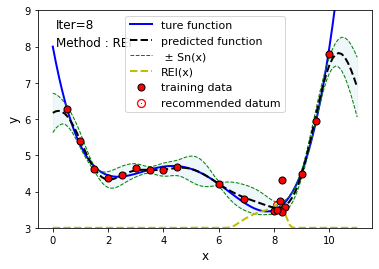

current optimal is : 3.5493159598351505
The next datum recomended by Reinterpolation Expected Improvement : 
 x =  [8.11111111]
--------------Draw samples-------------
real std of added datum: 0.5
1 -th sampling, result =  3.7622106571400087
2 -th sampling, result =  3.982728535870547
3 -th sampling, result =  3.364931265555653
4 -th sampling, result =  3.1719987652107595
evaluated mean of added datum: [3.57046731]
evaluated std of added datum: 0.31927538124674737
---------------------------------------

10-th iteration 
 new added datum: [8.1, array([3.5705])]


<Figure size 432x288 with 0 Axes>

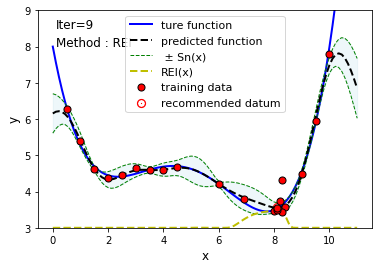

current optimal is : 3.5523182739703083
The next datum recomended by Reinterpolation Expected Improvement : 
 x =  [8.22222222]
--------------Draw samples-------------
real std of added datum: 0.2
1 -th sampling, result =  3.4912432120367414
2 -th sampling, result =  3.5432881507775877
3 -th sampling, result =  3.646853535935258
4 -th sampling, result =  3.6675208027619277
evaluated mean of added datum: [3.58722643]
evaluated std of added datum: 0.0727081985938568
---------------------------------------

11-th iteration 
 new added datum: [8.2, array([3.5872])]


<Figure size 432x288 with 0 Axes>

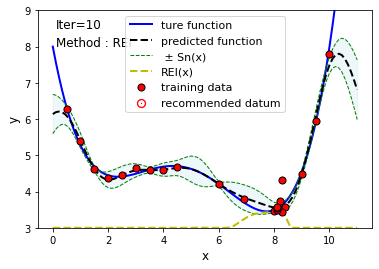

Searching is defeated


<Figure size 432x288 with 0 Axes>

In [9]:
obs = 4

data = pd.read_csv('data.csv')
data_matrix, Measured_response,Measured_std = generate_function(data,obs)
for i in range(500):
    plt.figure()
    ax1 = plt.subplot()
    ax1.set_ylim([3, 9])
    
   
    class Kriging_model(object):
        def fit_pre(self,xtrain,ytrain,xtest):
            # instantiated model
            kernel = RBF() 
            mdoel = GaussianProcessRegressor(kernel=kernel,normalize_y=True,alpha = Measured_std**2).fit(xtrain,ytrain)
            # defined the attribute's outputs
            mean,std = mdoel.predict(xtest,return_std=True)
            return mean,std  
    

    y_mean_pre,y_mean_std = Kriging_model().fit_pre(data_matrix, Measured_response, virtual_samples.reshape(-1,1))
    ax1.scatter(data_matrix,Measured_response,c='r',s=50,zorder=10,edgecolors=(0,0,0),label="training data")
    ax1.plot(virtual_samples,True_function(virtual_samples),'b',lw=2,label="ture function")
    ax1.plot(virtual_samples,y_mean_pre,'k--',lw=2,zorder=9,label="predicted function")
    ax1.fill_between(virtual_samples,y_mean_pre-y_mean_std,y_mean_pre+y_mean_std,alpha=0.2,color='lightblue')
    ax1.plot(virtual_samples,y_mean_pre-y_mean_std,'g--',lw=1,label=' ± Sn(x)') 
    ax1.plot(virtual_samples,y_mean_pre+y_mean_std,'g--',lw=1)

    
    Bgolearn = BGOS.Bgolearn()
    # min_search = False:  searching the global maximum
    model = Bgolearn.fit(Kriging_model,data_matrix,Measured_response,virtual_samples,opt_num = 1,min_search = True)
    # recall the utility function 
    _return = model.Reinterpolation_EI()*10 + 3
    
    
    index = np.random.choice(np.flatnonzero(_return == _return.max()))
    recommend = virtual_samples[index]
    ax1.plot(virtual_samples,_return,'y--',lw=2,label='{name}(x)'.format(name = method_name))
    
    # give an intrinsic std to recommended datum
    sam_std = round(random.uniform(0.1,0.7),1)
    datum_y, datum_std = Sam_function(round(recommend,1),sam_std,obs)
    Measured_std = np.append(Measured_std,datum_std)
    data_matrix = np.append(data_matrix,np.round(recommend,1)).reshape(-1,1)
    Measured_response = np.append(Measured_response,np.round(datum_y,4))

    print("{num}-th iteration".format(num = i + 1),'\n', 'new added datum:',([np.round(recommend,1),np.round(datum_y,4)]))
    ax1.scatter(round(recommend,1),_return[index],c='red',s=1.5,linewidths=8,label="recommended datum") 
    
    
    plt.text(0.1,8,'Method : {name}'.format(name = method_name),fontsize=12,color='k')
    plt.text(0.1,8.5,'Iter={}'.format(i),fontsize=12,color='k')
    plt.xlabel('x',fontsize = 12)
    plt.ylabel('y',fontsize = 12)
    plt.legend(fontsize = 11)
    plt.savefig('{name}-obs_{obstime}-{num}.png'.format(name = method_name,obstime = obs,num = i),dpi=800)
    plt.show()
    plt.clf()
    if 7.6 <= round(recommend,1) <= 7.8:
        break
    elif i>=10:
        print('Searching is defeated')
        break

------------12 original data-----------
evaluated mean of y : [6.38302126 5.47159103 4.62333861 4.45561327 4.45288222 4.66633633
 4.60958967 4.62022357 4.74050698 4.45448135 5.94232697 7.79008494]
evaluated std of y : [0.31854553 0.36548063 0.05840252 0.72653212 0.30438189 0.24369472
 0.0862756  0.38254565 0.23908561 0.10964916 0.20850551 0.21403299]
---------------------------------------

current optimal is : 4.352956863309499
The next datum recomended by Reinterpolation Expected Improvement : 
 x =  [8.44444444]
--------------Draw samples-------------
real std of added datum: 0.1
1 -th sampling, result =  3.599560280358092
2 -th sampling, result =  3.6720169804479186
3 -th sampling, result =  3.7302895133681395
4 -th sampling, result =  3.662058718240575
5 -th sampling, result =  3.7169414836939723
evaluated mean of added datum: [3.6761734]
evaluated std of added datum: 0.04620965384003648
---------------------------------------

1-th iteration 
 new added datum: [8.4, array([3.6762

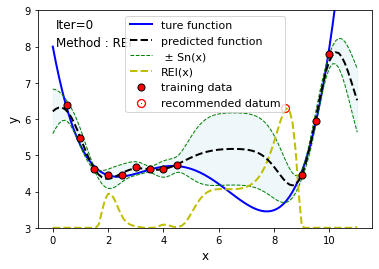

current optimal is : 3.6786395944727
The next datum recomended by Reinterpolation Expected Improvement : 
 x =  [7.33333333]
--------------Draw samples-------------
real std of added datum: 0.6
1 -th sampling, result =  2.8088724595671555
2 -th sampling, result =  2.516963974239882
3 -th sampling, result =  4.515456000030788
4 -th sampling, result =  3.785529108768725
5 -th sampling, result =  3.4397325563968826
evaluated mean of added datum: [3.41331082]
evaluated std of added datum: 0.7103171066474607
---------------------------------------

2-th iteration 
 new added datum: [7.3, array([3.4133])]


<Figure size 432x288 with 0 Axes>

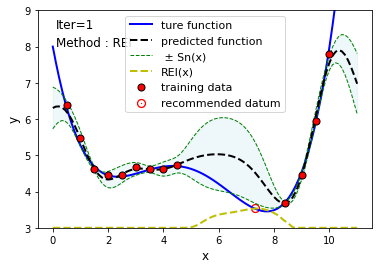

current optimal is : 3.6759800723437035
The next datum recomended by Reinterpolation Expected Improvement : 
 x =  [7.77777778]
--------------Draw samples-------------
real std of added datum: 0.1
1 -th sampling, result =  3.3676169161864102
2 -th sampling, result =  3.3691129455669233
3 -th sampling, result =  3.4611094377814906
4 -th sampling, result =  3.4470525282838866
5 -th sampling, result =  3.3894930773237117
evaluated mean of added datum: [3.40687698]
evaluated std of added datum: 0.03955985120422085
---------------------------------------

3-th iteration 
 new added datum: [7.8, array([3.4069])]


<Figure size 432x288 with 0 Axes>

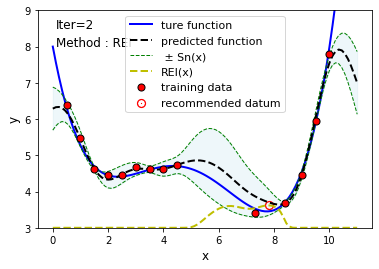

<Figure size 432x288 with 0 Axes>

In [10]:
obs = 5

data = pd.read_csv('data.csv')
data_matrix, Measured_response,Measured_std = generate_function(data,obs)
for i in range(500):
    plt.figure()
    ax1 = plt.subplot()
    ax1.set_ylim([3, 9])
    
   
    class Kriging_model(object):
        def fit_pre(self,xtrain,ytrain,xtest):
            # instantiated model
            kernel = RBF() 
            mdoel = GaussianProcessRegressor(kernel=kernel,normalize_y=True,alpha = Measured_std**2).fit(xtrain,ytrain)
            # defined the attribute's outputs
            mean,std = mdoel.predict(xtest,return_std=True)
            return mean,std  
    

    y_mean_pre,y_mean_std = Kriging_model().fit_pre(data_matrix, Measured_response, virtual_samples.reshape(-1,1))
    ax1.scatter(data_matrix,Measured_response,c='r',s=50,zorder=10,edgecolors=(0,0,0),label="training data")
    ax1.plot(virtual_samples,True_function(virtual_samples),'b',lw=2,label="ture function")
    ax1.plot(virtual_samples,y_mean_pre,'k--',lw=2,zorder=9,label="predicted function")
    ax1.fill_between(virtual_samples,y_mean_pre-y_mean_std,y_mean_pre+y_mean_std,alpha=0.2,color='lightblue')
    ax1.plot(virtual_samples,y_mean_pre-y_mean_std,'g--',lw=1,label=' ± Sn(x)') 
    ax1.plot(virtual_samples,y_mean_pre+y_mean_std,'g--',lw=1)

    
    Bgolearn = BGOS.Bgolearn()
    # min_search = False:  searching the global maximum
    model = Bgolearn.fit(Kriging_model,data_matrix,Measured_response,virtual_samples,opt_num = 1,min_search = True)
    # recall the utility function 
    _return = model.Reinterpolation_EI()*10 + 3
    
    
    index = np.random.choice(np.flatnonzero(_return == _return.max()))
    recommend = virtual_samples[index]
    ax1.plot(virtual_samples,_return,'y--',lw=2,label='{name}(x)'.format(name = method_name))
    
    # give an intrinsic std to recommended datum
    sam_std = round(random.uniform(0.1,0.7),1)
    datum_y, datum_std = Sam_function(round(recommend,1),sam_std,obs)
    Measured_std = np.append(Measured_std,datum_std)
    data_matrix = np.append(data_matrix,np.round(recommend,1)).reshape(-1,1)
    Measured_response = np.append(Measured_response,np.round(datum_y,4))

    print("{num}-th iteration".format(num = i + 1),'\n', 'new added datum:',([np.round(recommend,1),np.round(datum_y,4)]))
    ax1.scatter(round(recommend,1),_return[index],c='red',s=1.5,linewidths=8,label="recommended datum") 
    
    
    plt.text(0.1,8,'Method : {name}'.format(name = method_name),fontsize=12,color='k')
    plt.text(0.1,8.5,'Iter={}'.format(i),fontsize=12,color='k')
    plt.xlabel('x',fontsize = 12)
    plt.ylabel('y',fontsize = 12)
    plt.legend(fontsize = 11)
    plt.savefig('{name}-obs_{obstime}-{num}.png'.format(name = method_name,obstime = obs,num = i),dpi=800)
    plt.show()
    plt.clf()
    if 7.6 <= round(recommend,1) <= 7.8:
        break
    elif i>=10:
        print('Searching is defeated')
        break